# DeepArk Figure 2 Notebook
- This notebook contains the code to reproduce figure 2 from the DeepArk manuscript.

# Setup
- Import packages and configure some package options

In [1]:
# Stats etc.
import numpy
import pandas
import h5py
import scipy

# Viz
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cbook

# Configure pandas printing.
pandas.options.display.max_rows = 24

/data/home/ecofer/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Plot Results from ALDOB Enhancer Predictions

In [2]:
def reset_plot_config():
    seaborn.set()
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)

    d = {"lines.linewidth": 0.4,
        "axes.linewidth": 0.4,
        "ytick.major.width": 0.4,
        "xtick.major.width": 0.4,
        "xtick.major.size": 3,
        "ytick.major.size": 3,
        "xtick.major.pad": 1,
        "ytick.major.pad": 1}

    for k, v in d.items():
        matplotlib.rcParams[k] = v

    matplotlib.rcParams["figure.dpi"] = 300
    matplotlib.rcParams["axes.facecolor"] = "none"
    matplotlib.rcParams["figure.facecolor"] = "none"
    matplotlib.rcParams["xtick.labelsize"] = 6
    matplotlib.rcParams["ytick.labelsize"] = 6
    matplotlib.rcParams["axes.labelsize"] = 6
    matplotlib.rcParams['axes.titlesize'] = 6
    matplotlib.rcParams['legend.fontsize'] = 6
    matplotlib.rcParams['axes.titlepad'] = 4
    matplotlib.rcParams['axes.ymargin'] = 0
    matplotlib.rcParams['axes.xmargin'] = 0
    for x in ["left", "right", "top", "bottom"]:
        matplotlib.rcParams["figure.subplot.{}".format(x)] = 0.08 if x in {"left",  "bottom"} else 0.99

    matplotlib.rcParams["legend.fancybox"] = False

    # Custome legend settings:    
    d = {"legend.borderpad" : 0.4,  
        "legend.labelspacing" : 0.0,  
        "legend.handlelength" : 2.0,  
        "legend.handleheight" : 0.7,
        "legend.handletextpad" : 0.,
        "legend.borderaxespad" : 0.4,
        "legend.fontsize": 6,
        "legend.borderpad": 0.4}

    #legend.columnspacing}
    for k, v in d.items():
        matplotlib.rcParams[k] = v
        
reset_plot_config()


## Load Metadata

In [3]:
# Read in metadata.
feat_df = pandas.read_csv("../DeepArk/data/mus_musculus.tsv", sep="\t") # NOTE: DO NOT change this.
feat_df.drop(["test_auc_roc", "test_auc_prc"], axis=1, inplace=True)

# Ensure proper ordering.
with open("../train/distinct_features.mus_musculus.txt", "r") as read_file:
    cur_accessions = [x.strip() for x in read_file.readlines()]
feat_df.set_index("accession", inplace=True)
feat_df = feat_df.loc[cur_accessions, :]
print("Finished.")

Finished.


## Read in Observed Expression Change

In [4]:
baseline = pandas.read_csv("../data/mpra_data.tsv", comment="#", sep="\t")
baseline = baseline[["Chromosome", "Position", "Reference allele", "Alternative allele", "Reported Expression Change"]]
baseline.columns = ["chrom", "pos", "ref", "alt", "expression_change"]
display(baseline)

,chrom,pos,ref,alt,expression_change
0,chr9,104195570,T,A,-0.152173
1,chr9,104195570,T,C,-0.117352
2,chr9,104195570,T,G,-0.120354
3,chr9,104195571,C,A,0.012217
4,chr9,104195571,C,G,0.402168
...,...,...,...,...,...
772,chr9,104195827,G,C,-0.113155
773,chr9,104195827,G,T,-0.170693
774,chr9,104195828,C,A,-0.046134
775,chr9,104195828,C,G,0.012144


## Load Predictions

In [5]:
# Load the hdf5.
h5 = h5py.File("../mpra/outputs/urn:mavedb:00000006-a-1_diffs.h5")
m = h5["data"][()]
h5.close()
ism_df = pandas.DataFrame(m)
ism_df.columns = feat_df.reset_index().sort_values("index", ascending=True)["accession"].tolist()

# Load the labels.
df = pandas.read_csv("../mpra/outputs/urn:mavedb:00000006-a-1_row_labels.txt", sep="\t", names=["pos", "ref", "alt"])
df["pos"] = (df["pos"] + 104193652)
ism_df = pandas.concat((df, ism_df), sort=False, axis=1)
ism_df = ism_df[(ism_df.pos >= 104195570) & (ism_df.pos <= 104195828)].reset_index()
ism_df["chrom"] = 'chr9'

# Merge w/ previous
ism_df = ism_df.merge(baseline, on=["chrom", "pos", "ref", "alt"], validate="one_to_one")
display(ism_df)

/data/home/ecofer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


,index,pos,ref,alt,ERX1167944,ERX1167945,ERX1167946,SRX013185,SRX020969,SRX020977,...,SRX994828,SRX997154,SRX997760,SRX997761,SRX997764,SRX997765,SRX997773,SRX997774,chrom,expression_change
0,5754,104195570,T,A,-5.313952e-06,-5.898299e-06,-7.812632e-06,4.335894e-05,3.234868e-07,2.468485e-06,...,1.246695e-06,-1.966123e-07,0.003411,0.006506,0.005001,0.006637,0.007947,0.005858,chr9,-0.152173
1,5755,104195570,T,C,2.150970e-04,2.255091e-04,1.837925e-04,6.647600e-05,9.026967e-07,9.683572e-06,...,-7.920607e-07,-3.145014e-07,-0.009681,-0.005001,-0.005377,-0.004065,-0.003204,0.008498,chr9,-0.117352
2,5756,104195570,T,G,5.387294e-06,3.559515e-06,8.349889e-07,4.923565e-05,2.249542e-07,2.067485e-06,...,8.798306e-07,-3.349878e-07,0.012847,0.015130,0.015838,0.016617,0.012456,0.007485,chr9,-0.120354
3,5757,104195571,C,A,-1.473975e-05,-1.819589e-05,-2.254447e-05,5.183974e-07,-3.874675e-08,-2.465997e-06,...,-8.455390e-08,-1.497435e-07,0.001013,0.002663,0.001596,0.001932,0.002998,0.004295,chr9,0.012217
4,5758,104195571,C,G,-1.400069e-06,-2.568646e-06,-4.550267e-06,2.195255e-05,5.515449e-08,-8.657662e-08,...,3.918776e-07,-2.025163e-07,0.009330,0.010958,0.010753,0.011415,0.008848,0.005375,chr9,0.402168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,6526,104195827,G,C,-3.324420e-05,-3.868603e-05,-2.967456e-05,-4.748555e-05,-8.113375e-09,-2.871238e-07,...,-7.098060e-07,9.167888e-08,-0.020698,-0.019906,-0.021979,-0.022090,-0.013640,-0.005918,chr9,-0.113155
773,6527,104195827,G,T,-4.185864e-05,-4.806742e-05,-3.689621e-05,-5.527894e-05,-2.600798e-07,-2.489185e-06,...,-8.979896e-07,2.813704e-08,-0.015806,-0.015796,-0.017444,-0.018065,-0.012650,-0.005597,chr9,-0.170693
774,6528,104195828,C,A,-1.735345e-06,-5.036651e-06,-2.827554e-06,-4.322390e-05,-1.057751e-07,-1.102682e-06,...,-2.235685e-06,-1.842704e-08,-0.021961,-0.021166,-0.023433,-0.024253,-0.015401,-0.005887,chr9,-0.046134
775,6529,104195828,C,G,8.029747e-07,6.879563e-07,6.280316e-06,1.136155e-05,-9.077667e-09,-3.596288e-07,...,-1.577646e-07,1.060655e-07,-0.012708,-0.012457,-0.013379,-0.014024,-0.008579,-0.003540,chr9,0.012144


## Plot Liver-specific DNase-seq (accession no. SRX3201109) Predictions Against Measured Expression Change

Pearson: 0.5874193095127456
Spearman: 0.7141530408597857


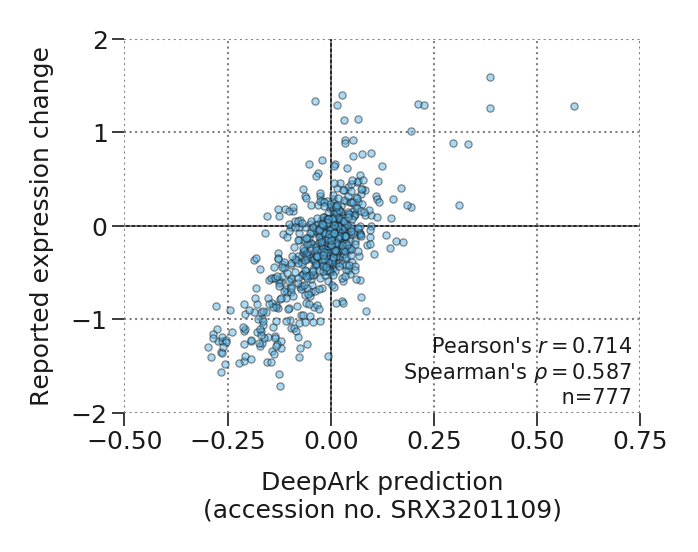

In [6]:
# Minor configuration.
accession = "SRX3201109"
# seaborn.set_style("ticks")
# seaborn.set_context("talk", font_scale=0.3, rc={"lines.linewidth": 0.4, "axes.linewidth": 0.4, "ytick.major.width": 0.4, "ytick.minor.width": 0.4,
#                                                 "xtick.major.width": 0.4, "ytick.major.width": 0.4, "ytick.major.size": 3, "ytick.minor.size": 1.5,
#                                                 "ytick.major.length": 3, "xtick.major.size": 3, "xtick.minor.size": 1.5, "xtick.major.length": 3, 
#                                                 "dpi": 300})
# matplotlib.rc('font', size=12)
reset_plot_config()
figure, (ax) = plt.subplots(1, 1, figsize=(7/2.54 / 1.4193330064776417 * (5/4), 7/2.54 / 1.4193330064776417), edgecolor='black', facecolor='white')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(True, linestyle=':', color="grey", linewidth=0.5, zorder=-1)
plt.axhline(0, zorder=1, linewidth=0.4, linestyle="-", color="black")
plt.axvline(0, zorder=1, linewidth=0.4, linestyle="-", color="black")



plt.scatter(ism_df[accession], ism_df["expression_change"], color="#56b4e9", alpha=0.5, s=3, edgecolor='k', linewidth=0.3, zorder=2)

plt.xlabel("DeepArk prediction\n(accession no. SRX3201109)")
plt.ylabel("Reported expression change")
plt.gca().set_xticks(numpy.arange(0, 6) * 0.25 - 0.5, minor=False)
plt.gca().set_yticks(numpy.arange(0, 5) * 1 - 2, minor=False)
pearson = scipy.stats.spearmanr(ism_df[accession],  ism_df["expression_change"])[0]
spearman = scipy.stats.pearsonr(ism_df[accession],  ism_df["expression_change"])[0]
print("Pearson:", pearson)
print("Spearman:", spearman)
ax.text(0.73, -1.9, "Pearson's $r=0.714$\nSpearman's $\\rho=0.587$\n n=777", fontsize=5, ha='right')
plt.tight_layout()
plt.savefig("/data/home/ecofer/pictures/deepark_drafting_figures/new_figure_3_B.svg", format="svg", bbox_inches="tight")
plt.show()

## Calculate Correlation Between Expression Change and Predicted Variant Effect for Each Regulatory Feature

In [7]:
cor_df = list()
for accession in feat_df.reset_index().sort_values("index", ascending=True)["accession"].tolist():
    y = ism_df.expression_change.values.copy()
    y_hat = ism_df[accession].values
    cor_df.append((accession, scipy.stats.spearmanr(y, y_hat)[0], scipy.stats.pearsonr(y, y_hat)[0]))
cor_df = pandas.DataFrame(cor_df, columns=["accession", "spearmanr", "pearsonr"])
cor_df.set_index("accession", inplace=True)
display(cor_df)

,spearmanr,pearsonr
accession,,
ERX1167944,0.150352,0.044778
ERX1167945,0.161014,0.048363
ERX1167946,0.052050,0.013990
SRX013185,0.403848,0.478131
SRX020969,-0.202584,-0.294214
...,...,...
SRX997761,0.570871,0.695770
SRX997764,0.568508,0.701972
SRX997765,0.571808,0.703470


In [8]:
# Get accessions and highlighted accessions.
hl_accessions = {"SRX681499", "SRX188645", "SRX681492", "SRX681493", "SRX681494", "SRX681495", 
                 "SRX681496", "SRX681497", "SRX681498", "SRX191053", "SRX3201109"}
display(feat_df.loc[hl_accessions])

,index,genome,assay_target_class,assay_target,biosample_type_class,biosample_type,treatment,mutation,strain,n_positive_test_examples
accession,,,,,,,,,,
SRX681499,3807,mm9,Chromatin,DNase-seq,Liver,Liver,None,Arntl -/-,C57BL/6,10518
SRX681496,3804,mm9,Chromatin,DNase-seq,Liver,Liver,None,None,C57BL/6,13303
SRX681494,3802,mm9,Chromatin,DNase-seq,Liver,Liver,None,None,C57BL/6,14419
SRX3201109,2634,mm9,Chromatin,DNase-seq,Liver,Liver,None,None,CD-1,6787
SRX681497,3805,mm9,Chromatin,DNase-seq,Liver,Liver,None,None,C57BL/6,11206
SRX681493,3801,mm9,Chromatin,DNase-seq,Liver,Liver,None,None,C57BL/6,11821
SRX681492,3800,mm9,Chromatin,DNase-seq,Liver,Liver,None,None,C57BL/6,7171
SRX191053,1227,mm9,Chromatin,DNase-seq,Liver,Liver,None,None,C57BL/6,12985
SRX681498,3806,mm9,Chromatin,DNase-seq,Liver,Liver,None,None,C57BL/6,11756


## Plot Correlations 

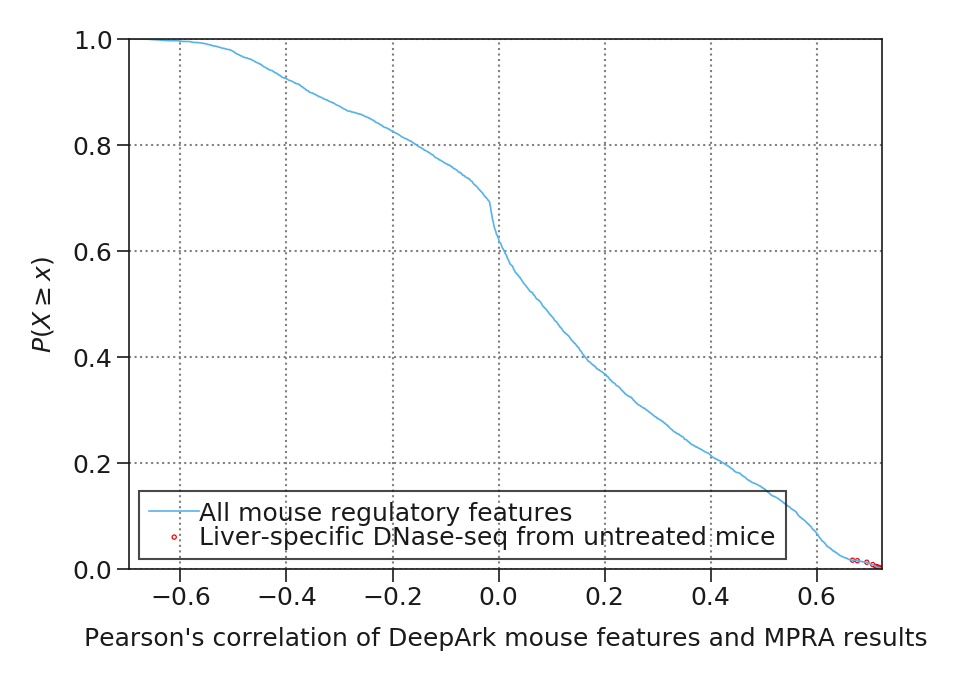

In [9]:
# Build plot.
reset_plot_config()
fig, ax = plt.subplots(1, 1, figsize=(7/2.54, 7/2.54 / 1.4193330064776417), facecolor='w', edgecolor='k')

# Get highlighted points.
corrs = list()
for accession in hl_accessions:
    corrs.append((accession, cor_df.loc[accession, "pearsonr"]))

# Empirical CDF:
a = cor_df["pearsonr"].values.copy()
x = numpy.sort(a)
y = 1 - numpy.arange(len(x))/float(len(x))
ax.plot(x, y, color="#56b4e9", label='All mouse regulatory features')

# Plot highlighted points.
flag = False
for (lbl, dat) in corrs:
    m = (x == dat)
    d = dict()
    if flag is False:
        d["label"] = "Liver-specific DNase-seq from untreated mice"
    ax.scatter(x[m], y[m], color='none', s=1, edgecolor='red', linewidth=0.3, zorder=2, **d)
    flag = True

# Some formatting.
legend = plt.legend(loc='lower left', columnspacing=0, frameon=True)
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_edgecolor('k')
ax.set_ylabel("$P(X\\geq x)$")
ax.set_xlabel("Pearson's correlation of DeepArk mouse features and MPRA results")
plt.grid(True, linestyle=':', color="grey", linewidth=0.5, zorder=-1)

plt.show()